In [1]:
import sys
sys.path.append('../')
from src import optimizer as _optimizer
from src import visualization as _visualization
from src import metrics as _metrics
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np 
import seaborn as sns

sns.set(rc={'figure.figsize':(20,8)})
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
pd.set_option('display.max_rows', 120)

## Reading / Displaying the Data 

In [2]:
df_dataset_v2 = pd.read_csv('../data/forecast_dataset_exp1.csv')

In [3]:
df_dataset_v2.describe()

,month,unit_markup,Y,hc_cluster_1,hc_cluster_2,hc_cluster_3,hc_cluster_4,hc_cluster_5,hc_cluster_6,hc_cluster_7,...,cat_code_1,cat_code_2,cat_code_3,cat_code_4,cat_code_5,cat_code_6,cat_code_7,cat_code_8,cat_code_9,cat_code_10
count,10938.000000,10938.000000,10938.000000,10938.000000,10938.000000,10938.000000,10938.000000,10938.000000,10938.000000,10938.000000,...,10938.000000,10938.000000,10938.000000,10938.000000,10938.000000,10938.000000,10938.000000,10938.000000,10938.000000,10938.000000
mean,6.237338,1.696480,13.862498,0.884440,0.004663,0.014445,0.004754,0.009508,0.020570,0.001463,...,0.002926,0.001828,0.003748,0.056409,0.009508,0.020570,0.001463,0.003383,0.011062,0.004663
std,3.635111,0.415631,34.969990,0.319712,0.068127,0.119322,0.068789,0.097049,0.141948,0.038220,...,0.054012,0.042724,0.061112,0.230720,0.097049,0.141948,0.038220,0.058065,0.104599,0.068127
min,1.000000,0.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,1.400000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.000000,1.700000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,10.000000,2.000000,11.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,12.000000,4.800000,643.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
df_dataset_v2.head()

,code,year_month,month,unit_markup,Y,hc_cluster_1,hc_cluster_2,hc_cluster_3,hc_cluster_4,hc_cluster_5,...,cat_code_1,cat_code_2,cat_code_3,cat_code_4,cat_code_5,cat_code_6,cat_code_7,cat_code_8,cat_code_9,cat_code_10
0,0671c2b9132a3f5215a4212ce0691694,2016-11,11,1.1,53,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0671c2b9132a3f5215a4212ce0691694,2016-11,11,1.2,92,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0671c2b9132a3f5215a4212ce0691694,2016-11,11,1.3,28,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0671c2b9132a3f5215a4212ce0691694,2016-11,11,1.4,61,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0671c2b9132a3f5215a4212ce0691694,2016-11,11,1.5,21,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
X_cols = [c for c in df_dataset_v2.columns if c not in ['year_month', 'Y'] and 'hc_cluster' not in c]

In [6]:
df_dataset_v2['code'] = df_dataset_v2['code'].astype('category').cat.codes

In [7]:
df_dataset_v2[X_cols].head()

,code,month,unit_markup,kmeans_cluster_0,kmeans_cluster_1,kmeans_cluster_2,kmeans_cluster_3,kmeans_cluster_4,kmeans_cluster_5,kmeans_cluster_6,...,cat_code_1,cat_code_2,cat_code_3,cat_code_4,cat_code_5,cat_code_6,cat_code_7,cat_code_8,cat_code_9,cat_code_10
0,0,11,1.1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,11,1.2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,11,1.3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,11,1.4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,11,1.5,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Splitting the Sets
* We will use the temporal series cross validation
* 3 months minimum intervals
* 3 training, 6 validation, 3 test
* 4 training, 5 validation, 3 test
* 5 training, 4 validation, 3 test
* 6 training, 3 validation, 3 test

In [8]:
df_train_val_test = pd.read_csv('../data/train_val_test.csv')

In [9]:
df_train_val_test

,set,train,val,reserved
0,0,"['2016-06', '2016-07', '2016-08']","['2016-09', '2016-10', '2016-11', '2016-12', '...",False
1,1,"['2016-06', '2016-07', '2016-08', '2016-09']","['2016-10', '2016-11', '2016-12', '2017-01', '...",False
2,2,"['2016-06', '2016-07', '2016-08', '2016-09', '...","['2016-11', '2016-12', '2017-01', '2017-02']",False
3,3,"['2016-06', '2016-07', '2016-08', '2016-09', '...","['2016-12', '2017-01', '2017-02']",False
4,4,"['2016-06', '2016-07', '2016-08', '2016-09', '...","['2017-01', '2017-02']",False
5,5,"['2016-06', '2016-07', '2016-08', '2016-09', '...",['2017-02'],False
6,6,"['2016-06', '2016-07', '2016-08', '2016-09', '...","['2017-03', '2017-04', '2017-05']",True


## Regressors Init

In [10]:
regressors = {}
RANDOM_STATE = 42

In [11]:
import lightgbm as lgb
gbm = lgb.LGBMRegressor(random_state=RANDOM_STATE)
regressors['gbm'] = gbm

In [12]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=RANDOM_STATE)
regressors['rf'] = rf

In [13]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=RANDOM_STATE)
regressors['dt'] = dt

In [14]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

## Train Eval



In [15]:
def parse_str_list(str_list):
    result = str_list.replace("'","").replace('[','').replace(']','').replace(' ', '').split(',')
    return result

In [16]:
sets = list(df_train_val_test[~df_train_val_test.reserved].set.values)
sets

[0, 1, 2, 3, 4, 5]

In [17]:
results = []
for r_name, r in regressors.items():
    for s in sets:
        df_set = df_train_val_test[~df_train_val_test.reserved & (df_train_val_test.set == s)]

        x_scaler = StandardScaler()
        
        train_years = parse_str_list(df_set.train.values[0])
        val_years = parse_str_list(df_set.val.values[0])
        print(f'Training {r_name} on set {s}')
        

        df_train = df_dataset_v2[df_dataset_v2.year_month.isin(train_years)]
        df_val = df_dataset_v2[df_dataset_v2.year_month.isin(val_years)]
#         print(df_train.year_month.unique(), train_years)
#         print(df_val.year_month.unique(), val_years)
    
        y_train = df_train['Y'].values    
        
        r_inst = r.fit(X=x_scaler.fit_transform(df_train[X_cols]), y=y_train)
        
        print(f'Validating {r_name}  on set {s}')
        y_val = df_val['Y']
        y_pred_val = r_inst.predict(x_scaler.transform(df_val[X_cols]))
        
        y_pred_val = y_pred_val
        m = _metrics.applyRegressionMetrics(y=y_val, y_pred=y_pred_val)
        m['reg_inst'] = r_inst
        m['r_name'] = r_name
        m['set'] = s
        results.append(m)
#         print(len(y_train), len(y_val))

    print()
df_results = pd.DataFrame(results)    

Training gbm on set 0
Validating gbm  on set 0
Training gbm on set 1
Validating gbm  on set 1
Training gbm on set 2
Validating gbm  on set 2
Training gbm on set 3
Validating gbm  on set 3
Training gbm on set 4
Validating gbm  on set 4
Training gbm on set 5
Validating gbm  on set 5

Training rf on set 0
Validating rf  on set 0
Training rf on set 1
Validating rf  on set 1
Training rf on set 2
Validating rf  on set 2
Training rf on set 3
Validating rf  on set 3
Training rf on set 4
Validating rf  on set 4
Training rf on set 5
Validating rf  on set 5

Training dt on set 0
Validating dt  on set 0
Training dt on set 1
Validating dt  on set 1
Training dt on set 2
Validating dt  on set 2
Training dt on set 3
Validating dt  on set 3
Training dt on set 4
Validating dt  on set 4
Training dt on set 5
Validating dt  on set 5



In [18]:
metric_list = []

In [19]:
df_results.groupby('r_name').agg({'RMSE':[pd.Series.mean, pd.Series.std],'MAPE':[pd.Series.mean, pd.Series.std],'MSE':[pd.Series.mean, pd.Series.std],'MAE':[pd.Series.mean, pd.Series.std],'R2':[pd.Series.mean, pd.Series.std],})

RMSE                MAPE                   MSE              \
             mean       std      mean       std        mean         std   
r_name                                                                    
dt      29.198495  1.359814  1.946963  0.346702  854.093039   79.973814   
gbm     24.945497  3.189353  2.641622  0.510899  630.754482  148.654422   
rf      25.924368  1.924300  2.165186  0.369319  675.158624   96.686941   

              MAE                  R2            
             mean       std      mean       std  
r_name                                           
dt      11.724708  0.497202  0.206790  0.133576  
gbm     11.317840  0.741727  0.432959  0.050062  
rf      10.898174  0.442459  0.381829  0.046431

Training gbm on set 6
Validating gbm on set 6 and 2017-03
7626 1073
RMSE : 22.9808
MAPE': 1.8057
MDAPE': 0.6667
MSE: 528.1193
MAE: 9.3122
R2: 0.5472


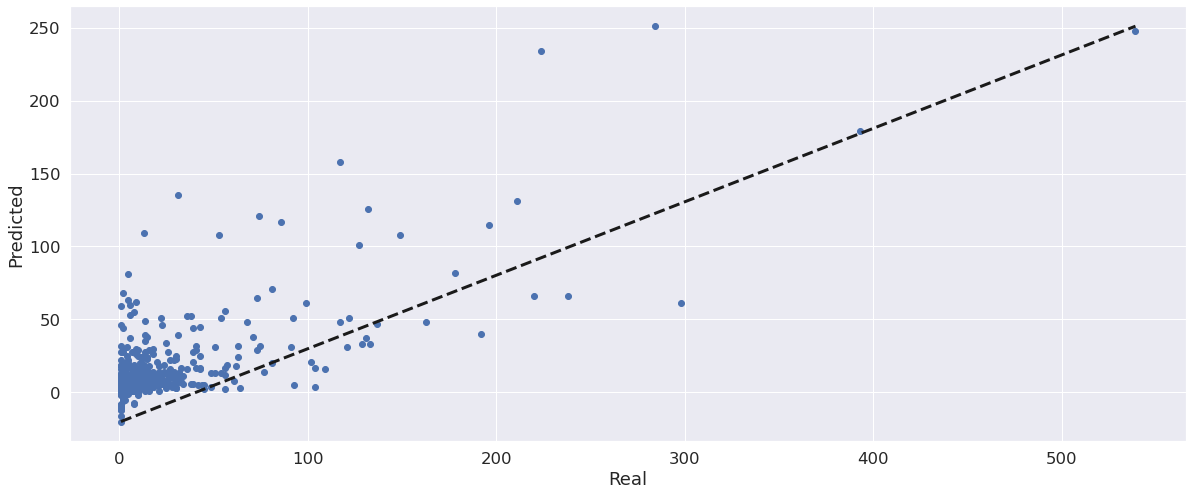

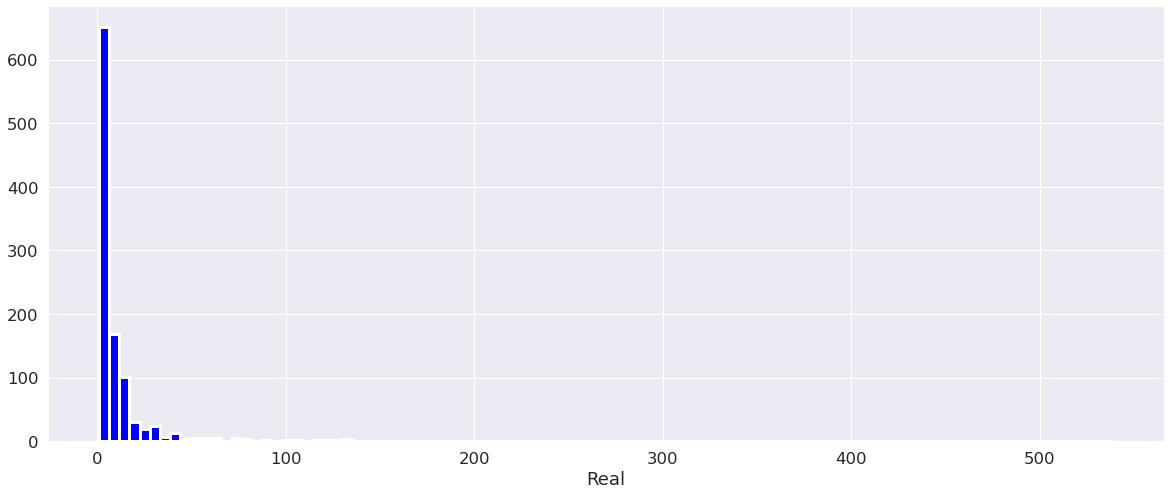

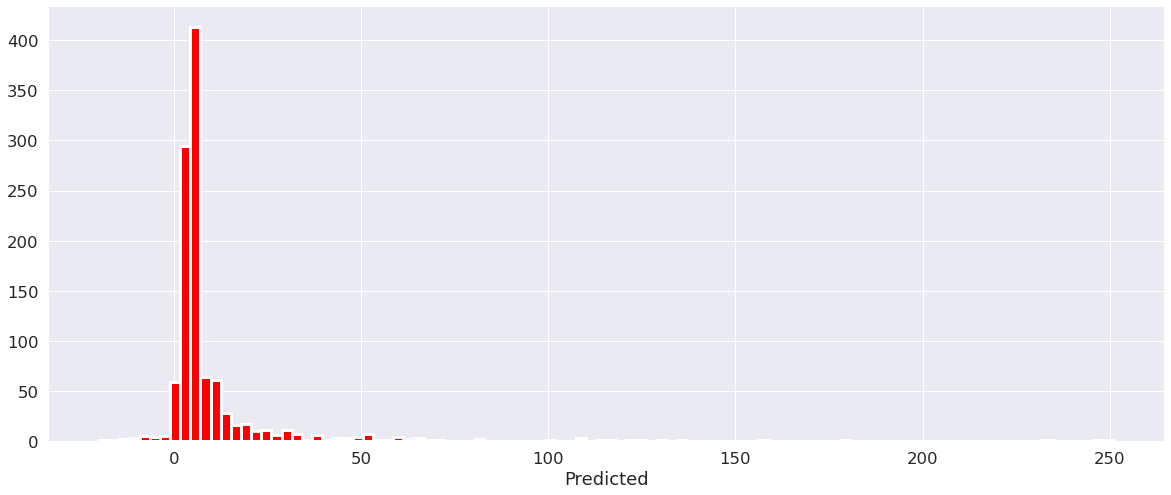


Validating gbm on set 6 and 2017-04
7626 1068
RMSE : 23.8973
MAPE': 2.0520
MDAPE': 0.7500
MSE: 571.0796
MAE: 9.4054
R2: 0.4027


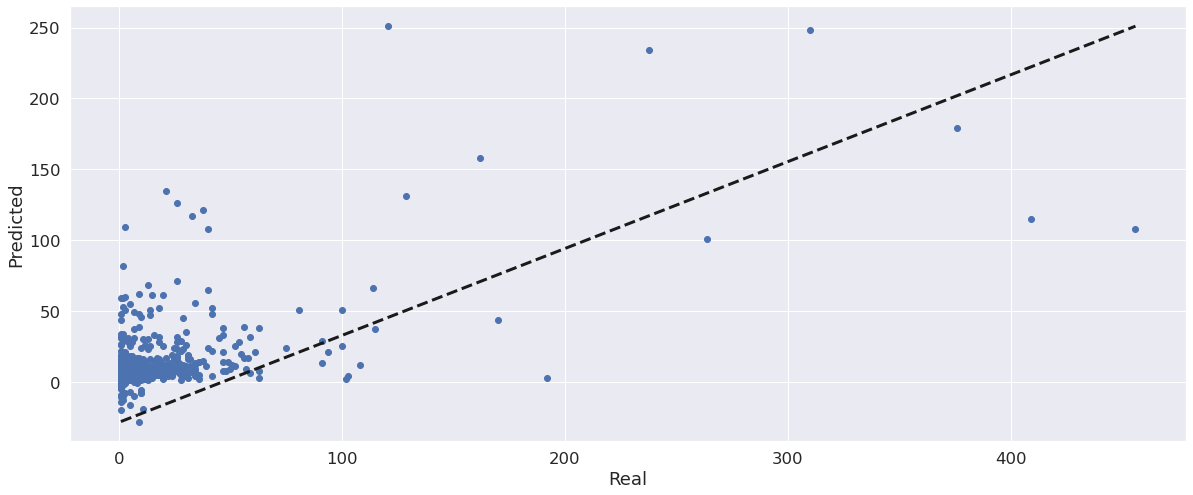

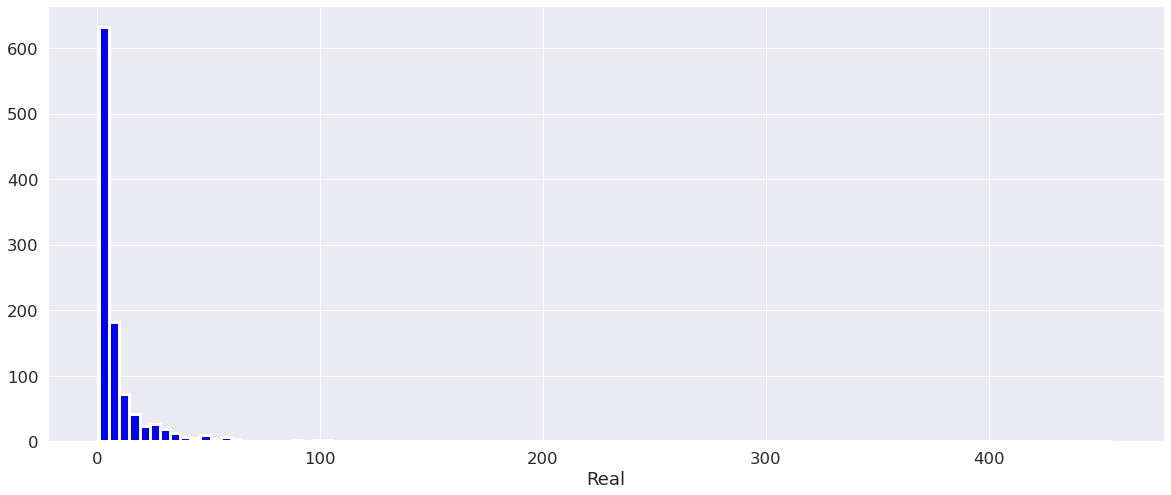

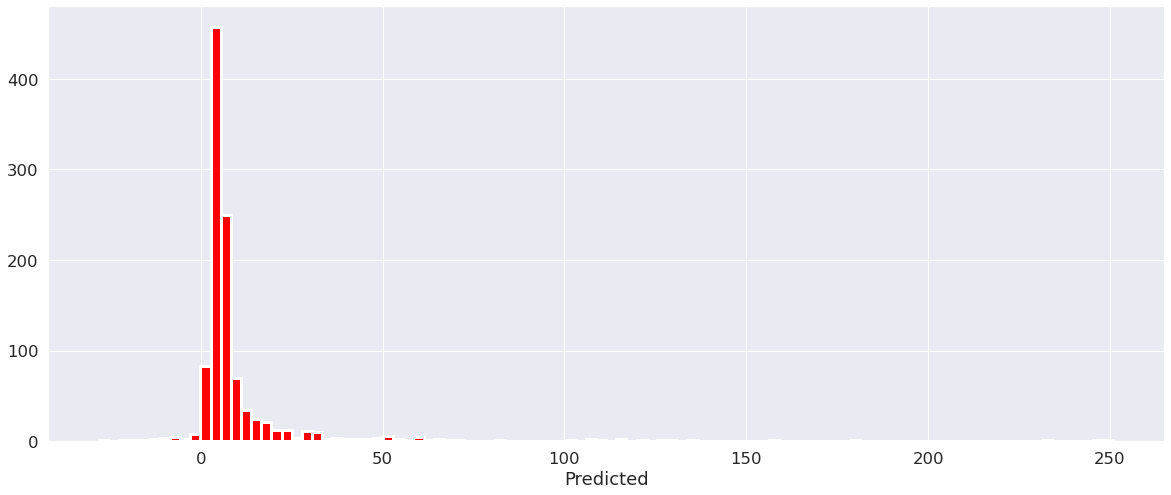


Validating gbm on set 6 and 2017-05
7626 1171
RMSE : 33.0765
MAPE': 1.7775
MDAPE': 0.6667
MSE: 1094.0521
MAE: 11.2989
R2: 0.3336


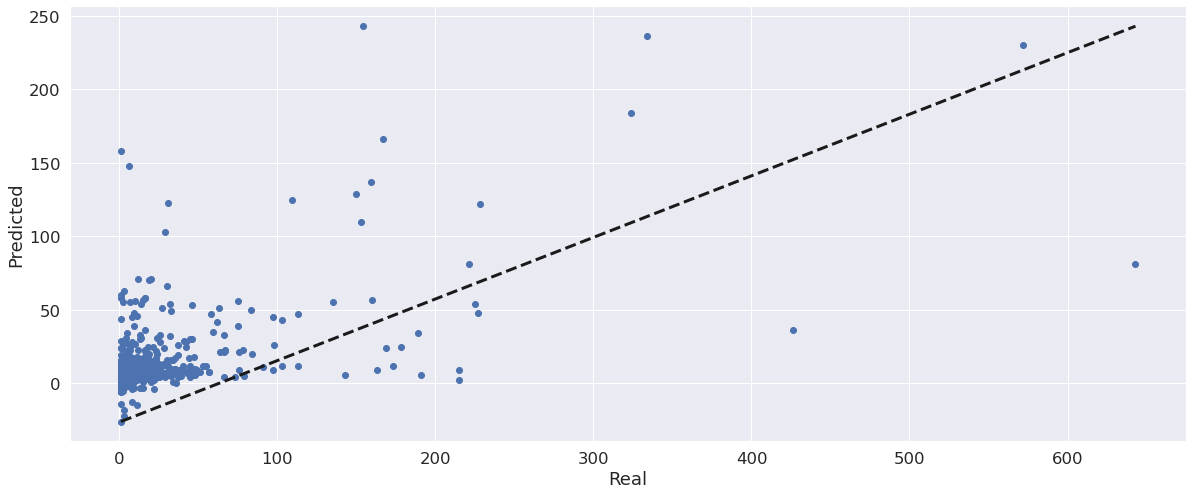

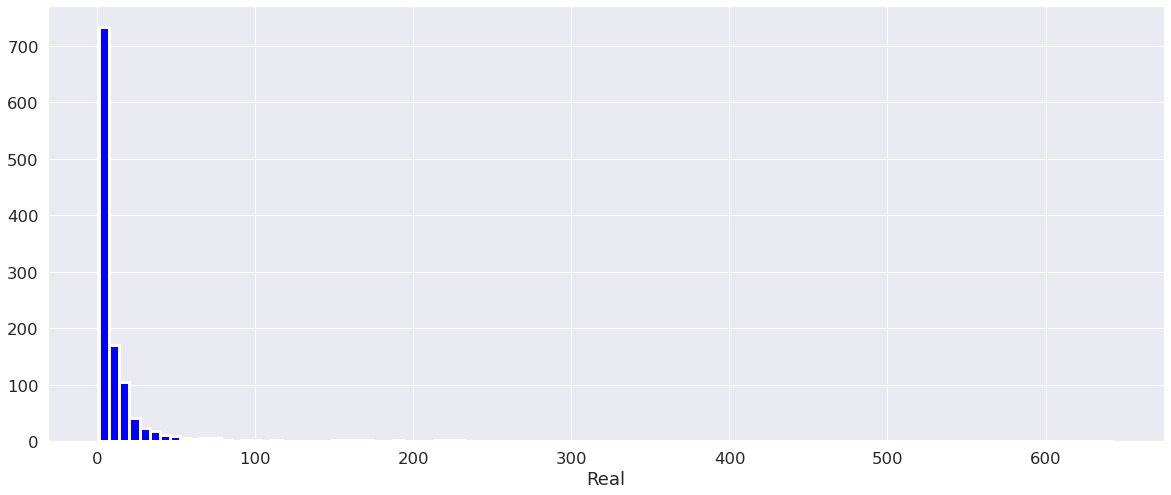

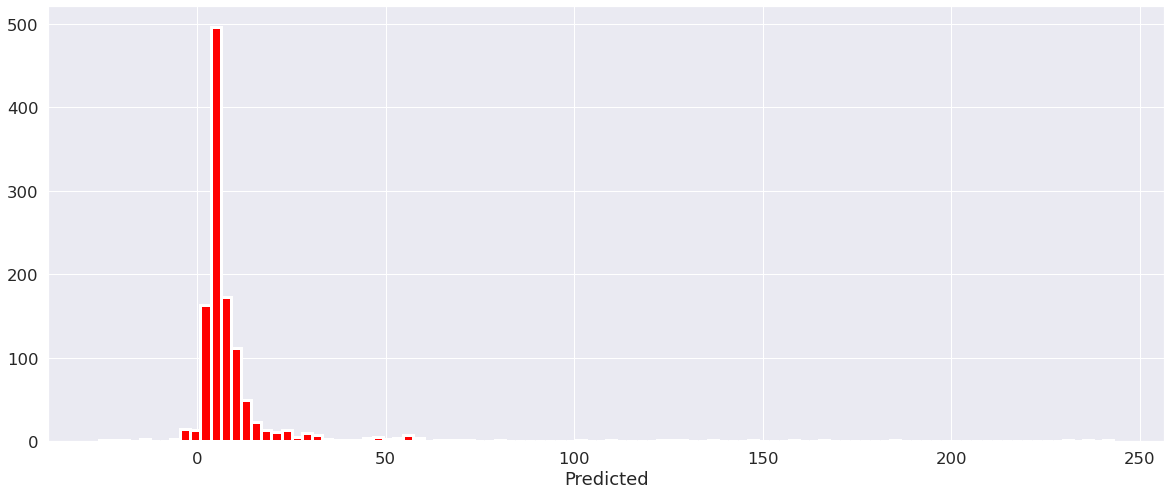


Training rf on set 6
Validating rf on set 6 and 2017-03
7626 1073
RMSE : 21.0675
MAPE': 1.4618
MDAPE': 0.5833
MSE: 443.8388
MAE: 8.3998
R2: 0.6195


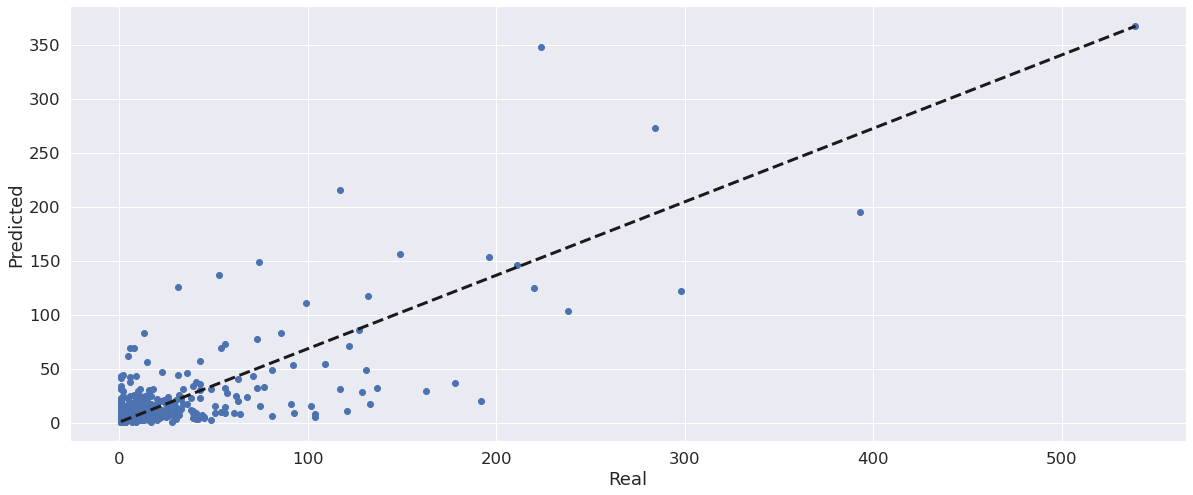

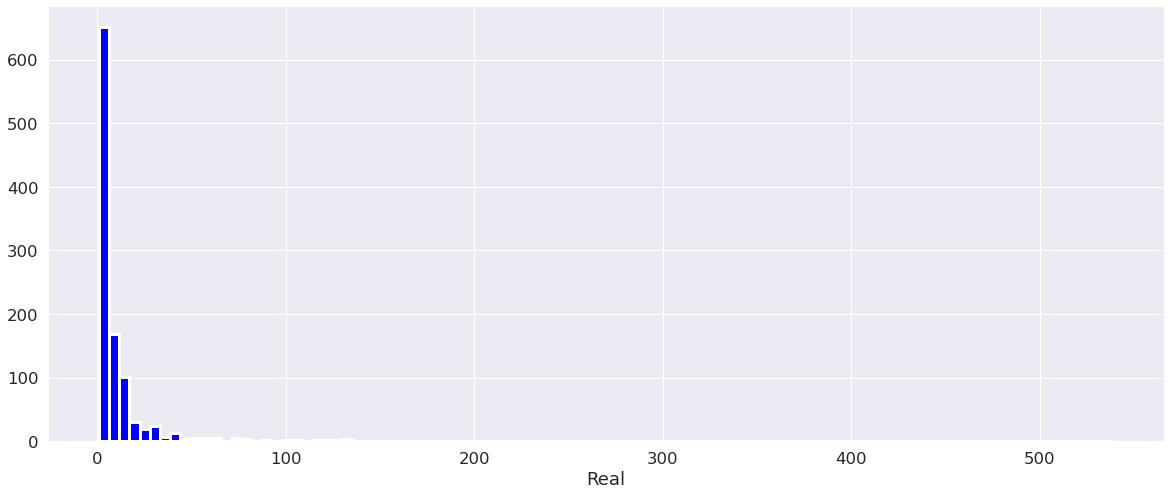

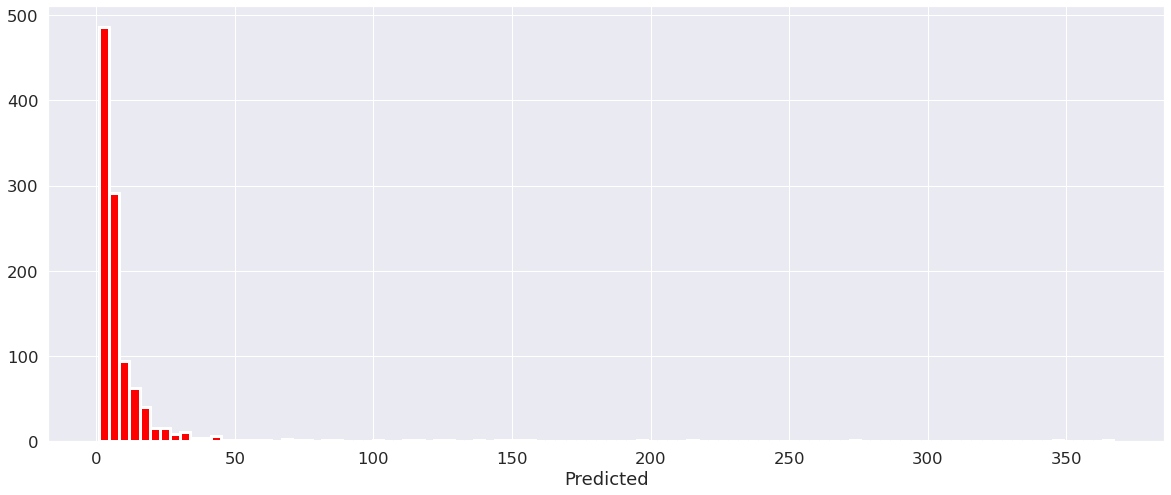


Validating rf on set 6 and 2017-04
7626 1068
RMSE : 25.4514
MAPE': 1.8998
MDAPE': 0.6667
MSE: 647.7715
MAE: 9.6498
R2: 0.3225


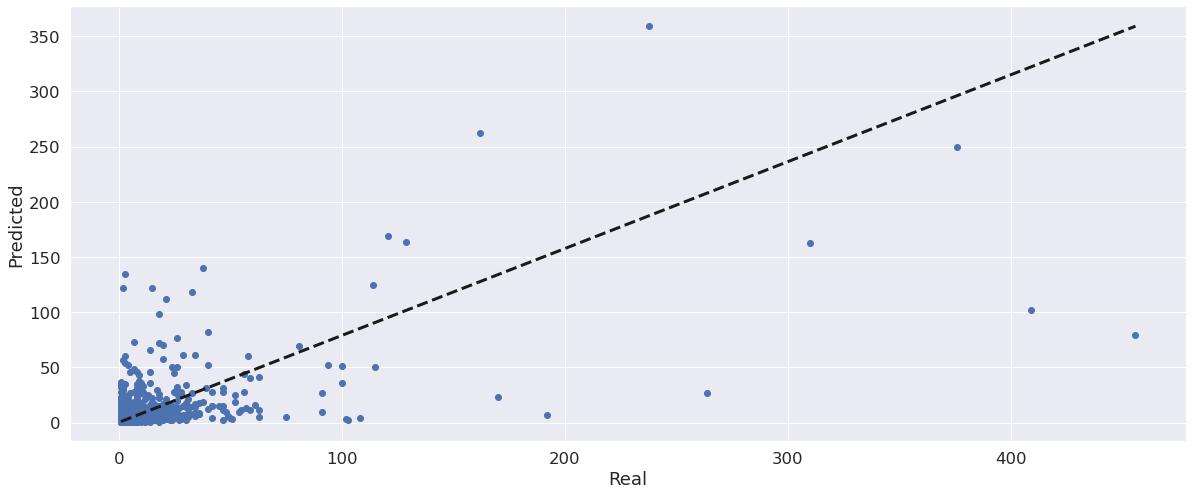

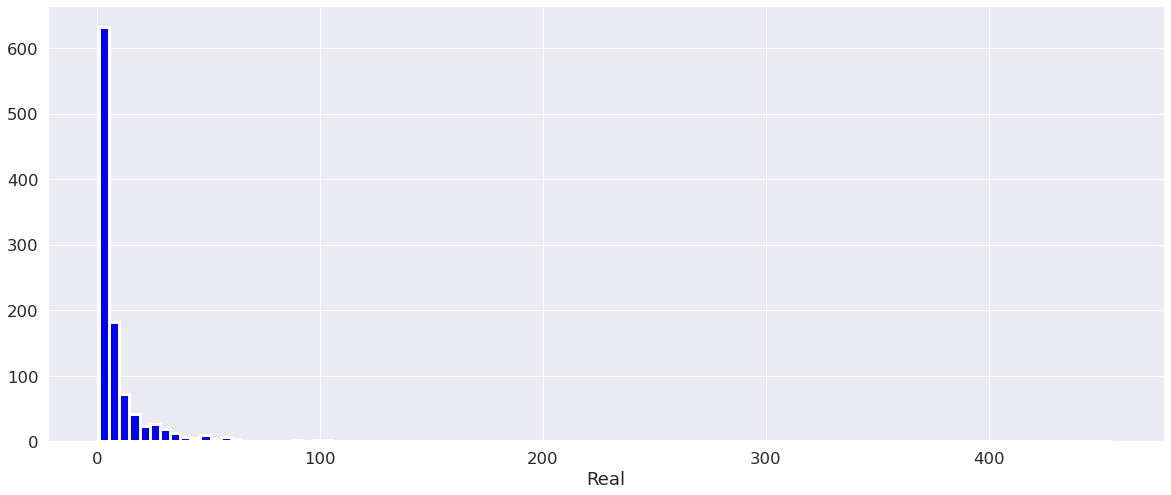

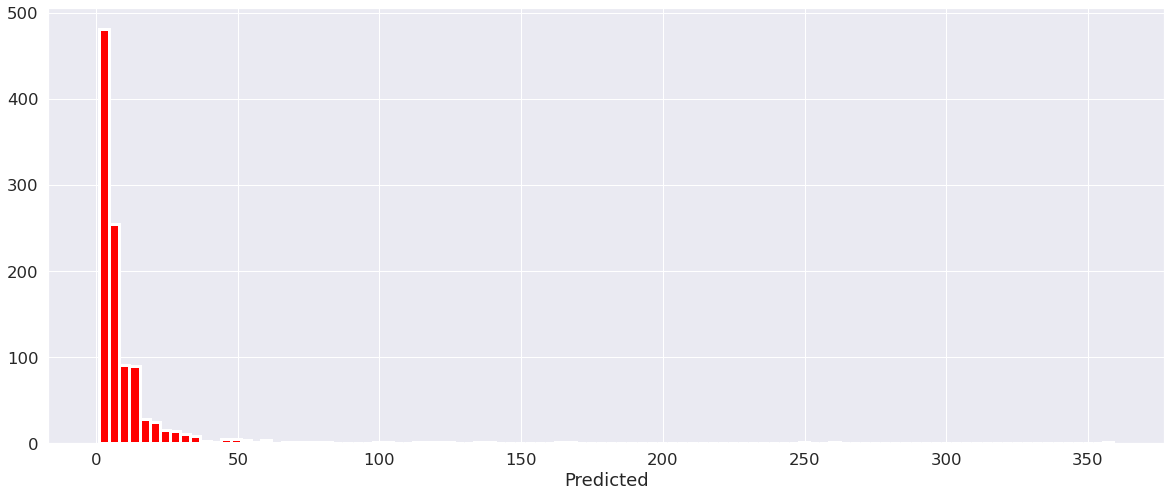


Validating rf on set 6 and 2017-05
7626 1171
RMSE : 34.4729
MAPE': 1.3697
MDAPE': 0.6316
MSE: 1188.3792
MAE: 11.3561
R2: 0.2762


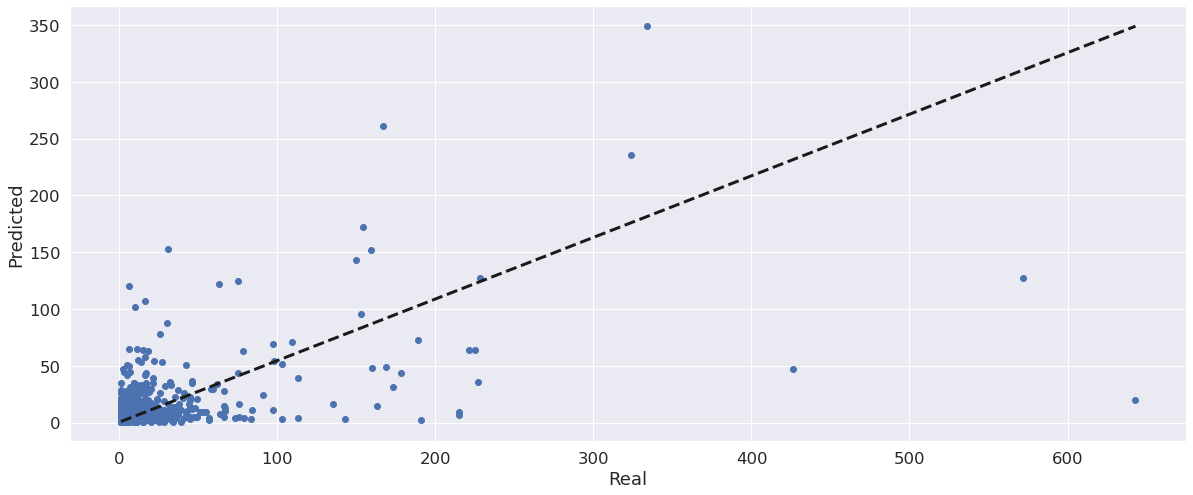

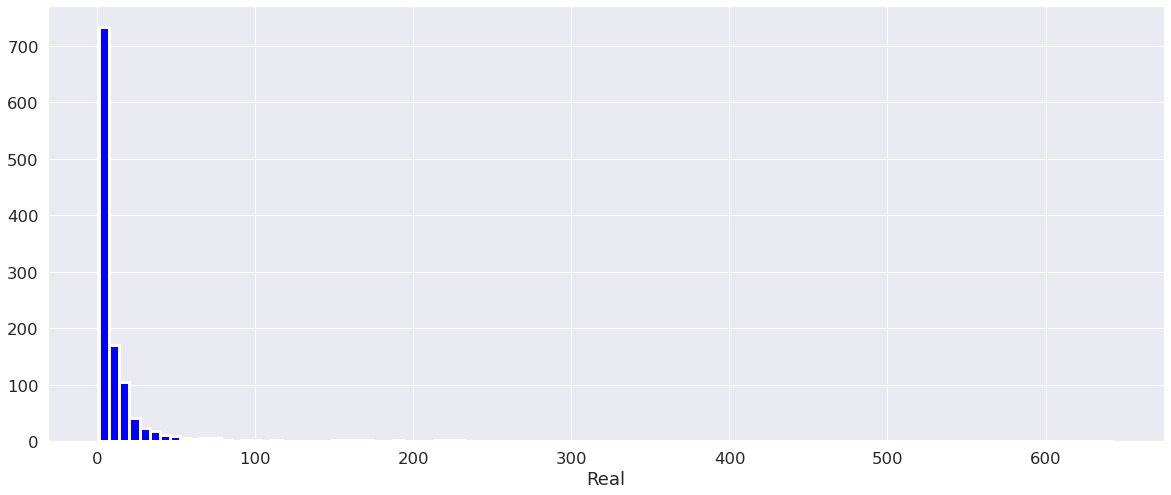

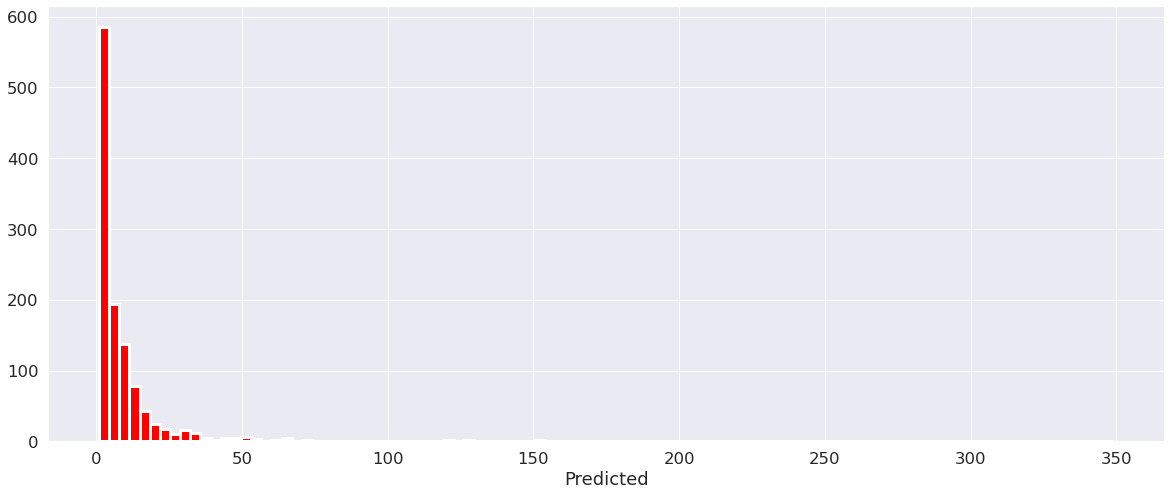


Training dt on set 6
Validating dt on set 6 and 2017-03
7626 1073
RMSE : 21.5024
MAPE': 1.2957
MDAPE': 0.5000
MSE: 462.3514
MAE: 8.5601
R2: 0.6036


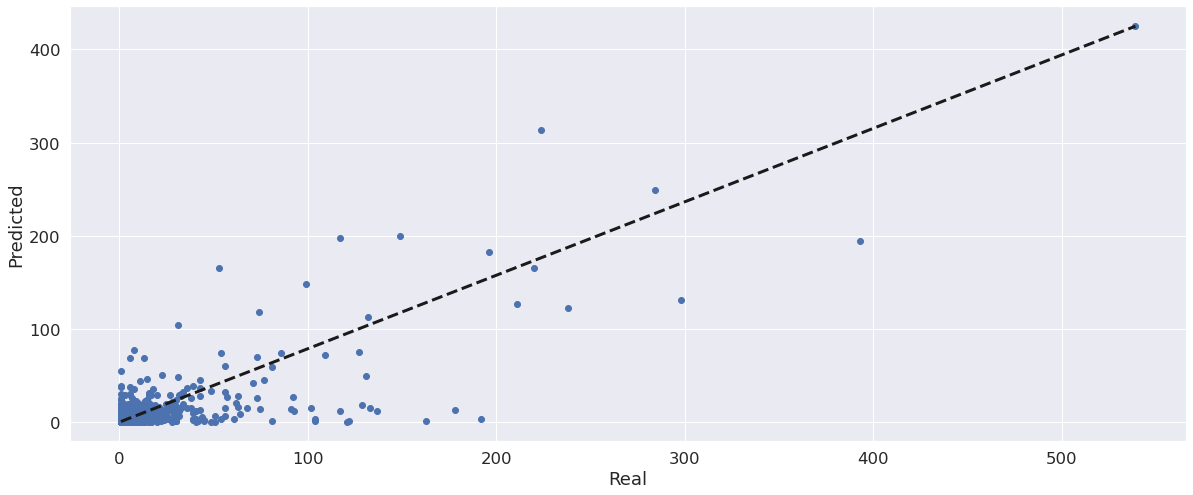

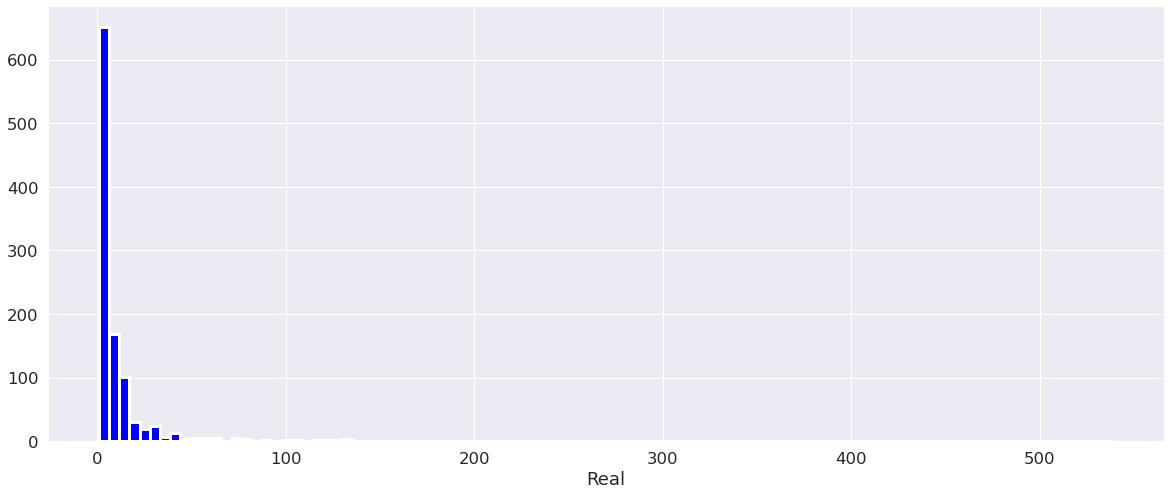

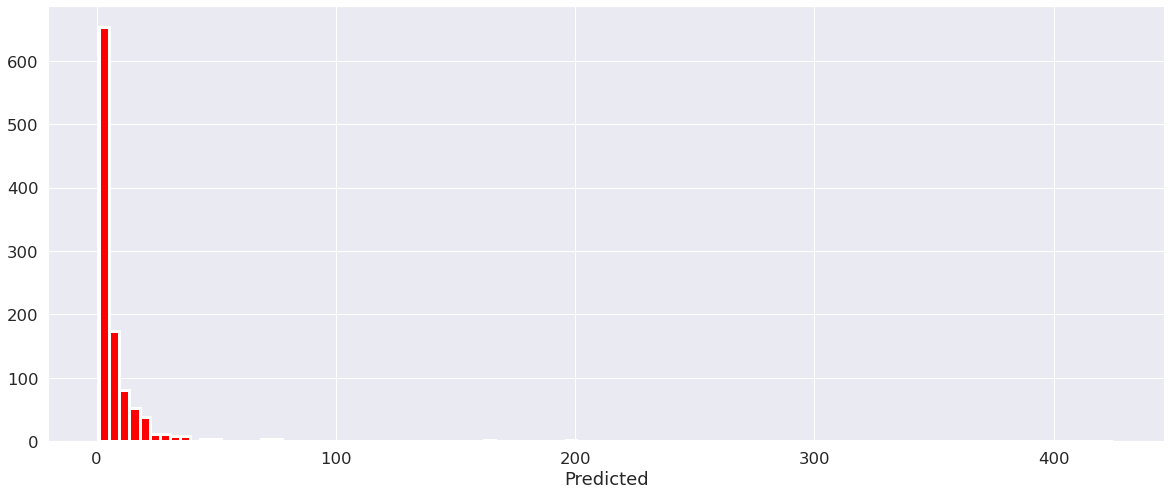


Validating dt on set 6 and 2017-04
7626 1068
RMSE : 28.9706
MAPE': 1.7947
MDAPE': 0.6667
MSE: 839.2949
MAE: 10.7575
R2: 0.1222


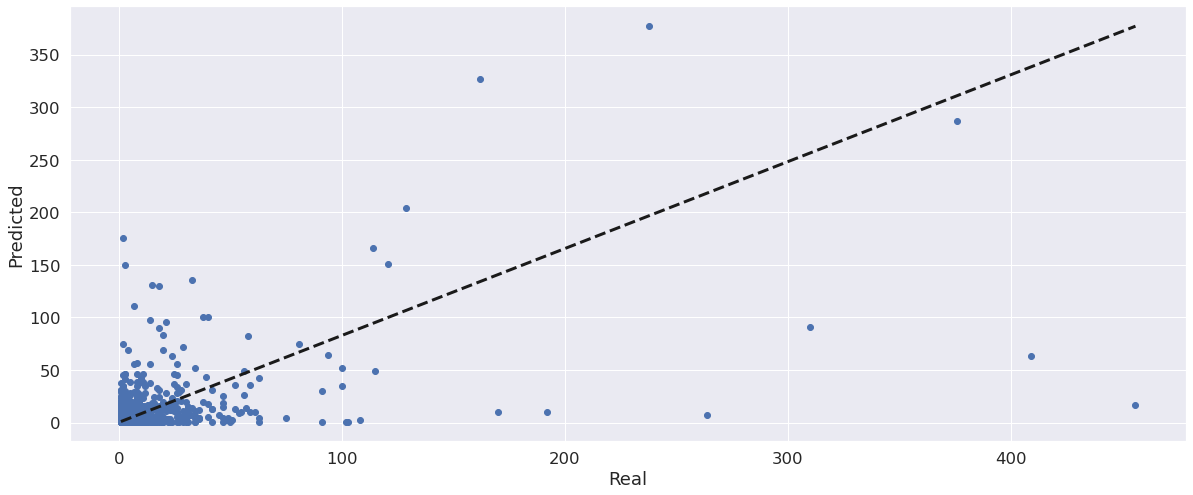

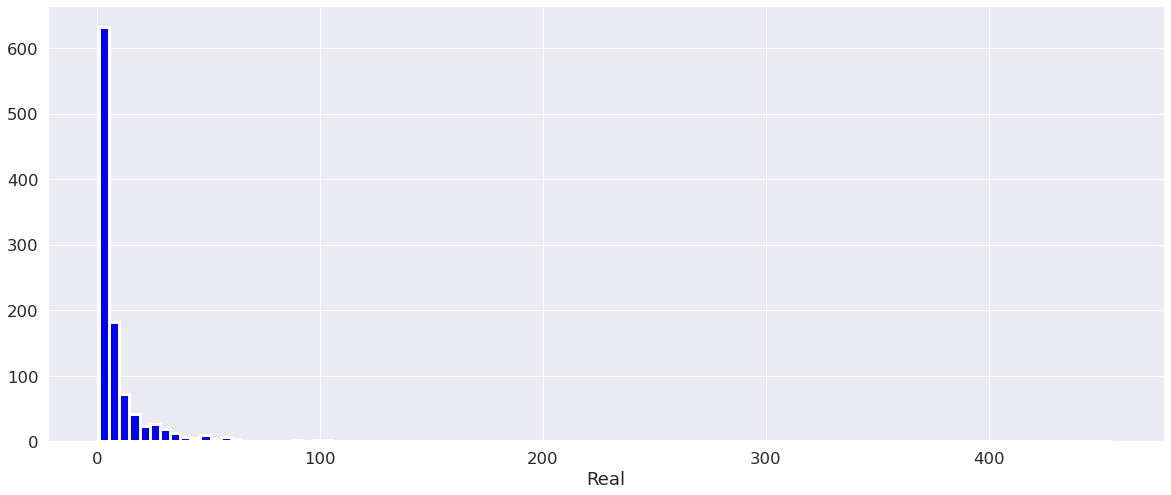

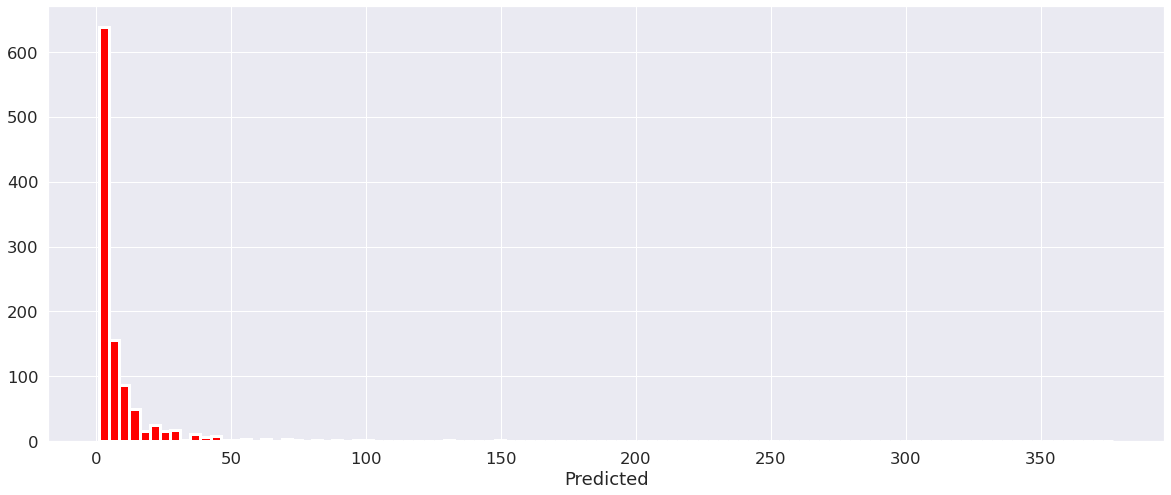


Validating dt on set 6 and 2017-05
7626 1171
RMSE : 36.3050
MAPE': 1.3565
MDAPE': 0.7143
MSE: 1318.0538
MAE: 12.6243
R2: 0.1972


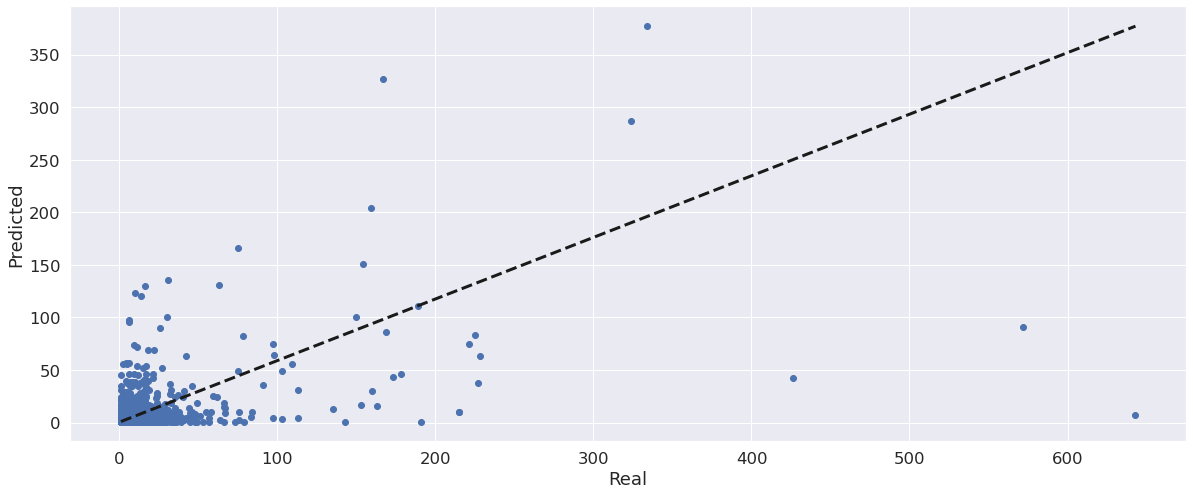

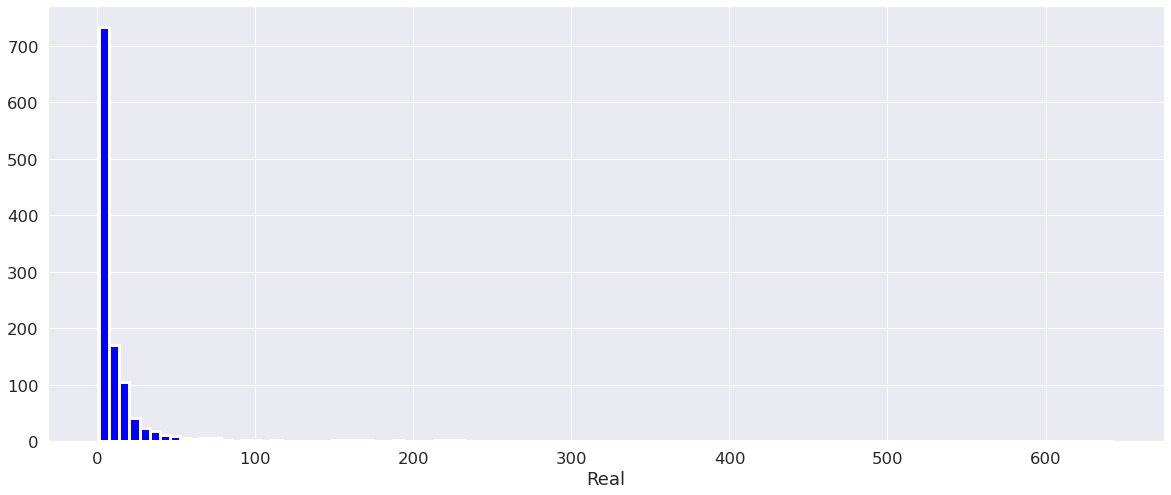

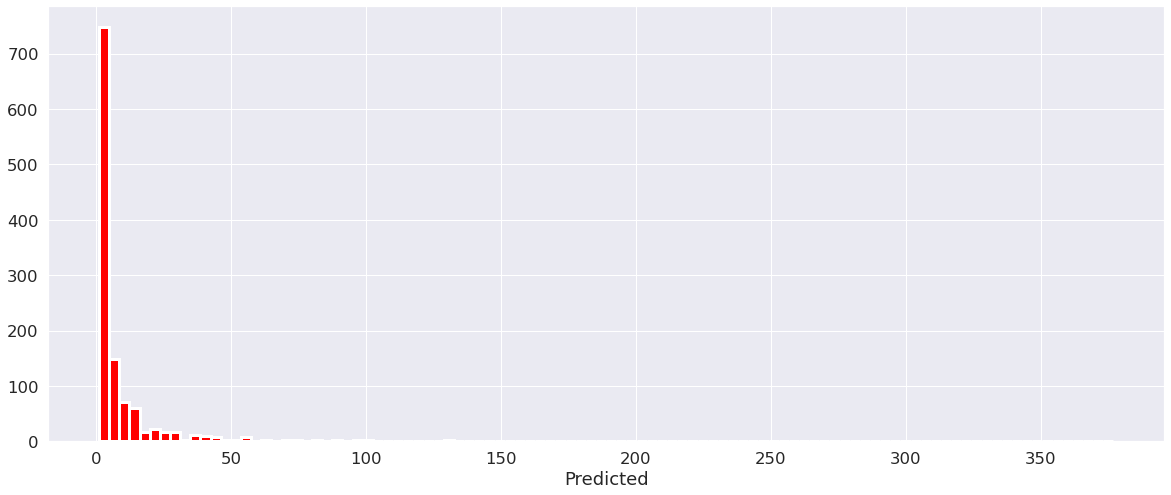

In [20]:
results = []
for r_name, r in regressors.items():
    s=6
    x_scaler = StandardScaler()

    df_set = df_train_val_test[(df_train_val_test.set == s)]

    x_scaler = StandardScaler()

    train_years = parse_str_list(df_set.train.values[0])
    val_years = parse_str_list(df_set.val.values[0])
    print(f'Training {r_name} on set {s}')

    df_train = df_dataset_v2[df_dataset_v2.year_month.isin(train_years)]    

    y_train = df_train['Y'].values    

    r_inst = r.fit(X=x_scaler.fit_transform(df_train[X_cols]), y=y_train.flatten())

    for val_year in val_years:
        df_val = df_dataset_v2[df_dataset_v2.year_month == val_year]
        print(f'Validating {r_name} on set {s} and {val_year}')
        y_val = df_val['Y']
        y_pred_val = r_inst.predict(x_scaler.transform(df_val[X_cols]))

        y_pred_val = y_pred_val
        m = _metrics.applyRegressionMetrics(y=y_val, y_pred=y_pred_val)
        m['reg_inst'] = r_inst
        m['r_name'] = r_name
        m['set'] = s
        m['year_month'] = val_year
        results.append(m)
        print(len(y_train), len(y_val))
        _metrics.evaluateRegression(y=y_val, y_pred=y_pred_val)
        print()
df_results = pd.DataFrame(results)    

In [21]:
df_results

,y,y_pred,RMSE,MAPE,MDAPE,MSE,MAE,R2,reg_inst,r_name,set,year_month
0,51 238 52 298 53 220 54 ...,"[66.0, 61.0, 66.0, 51.0, 39.0, 39.0, 31.0, 33....",22.980846,1.805678,0.666667,528.119292,9.312209,0.547232,LGBMRegressor(random_state=42),gbm,6,2017-03
1,65 15 66 114 67 81 68 ...,"[61.0, 66.0, 51.0, 39.0, 39.0, 31.0, 33.0, 33....",23.897272,2.051977,0.750000,571.079588,9.405431,0.402697,LGBMRegressor(random_state=42),gbm,6,2017-04
2,77 10 78 63 79 75 80 9...,"[56.0, 51.0, 56.0, 45.0, 39.0, 39.0, 31.0, 33....",33.076458,1.777518,0.666667,1094.052092,11.298890,0.333621,LGBMRegressor(random_state=42),gbm,6,2017-05
3,51 238 52 298 53 220 54 ...,"[103.0, 122.0, 125.0, 69.0, 44.0, 12.0, 17.0, ...",21.067481,1.461774,0.583333,443.838770,8.399814,0.619488,"(DecisionTreeRegressor(max_features='auto', ra...",rf,6,2017-03
4,65 15 66 114 67 81 68 ...,"[122.0, 125.0, 69.0, 44.0, 12.0, 17.0, 17.0, 2...",25.451356,1.899822,0.666667,647.771536,9.649813,0.322483,"(DecisionTreeRegressor(max_features='auto', ra...",rf,6,2017-04
5,77 10 78 63 79 75 80 9...,"[102.0, 122.0, 125.0, 69.0, 44.0, 12.0, 17.0, ...",34.472876,1.369727,0.631579,1188.379163,11.356106,0.276167,"(DecisionTreeRegressor(max_features='auto', ra...",rf,6,2017-05
6,51 238 52 298 53 220 54 ...,"[123.0, 131.0, 166.0, 75.0, 49.0, 7.0, 14.0, 1...",21.502357,1.295667,0.500000,462.351351,8.560112,0.603616,DecisionTreeRegressor(random_state=42),dt,6,2017-03
7,65 15 66 114 67 81 68 ...,"[131.0, 166.0, 75.0, 49.0, 7.0, 14.0, 15.0, 19...",28.970588,1.794673,0.666667,839.294944,10.757491,0.122165,DecisionTreeRegressor(random_state=42),dt,6,2017-04
8,77 10 78 63 79 75 80 9...,"[123.0, 131.0, 166.0, 75.0, 49.0, 7.0, 14.0, 1...",36.305011,1.356485,0.714286,1318.053800,12.624253,0.197183,DecisionTreeRegressor(random_state=42),dt,6,2017-05
